In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
from scipy.stats import median_test 

**Q2 Part A: Filter data to only include Republicans and state/poll rating**

In [2]:
poll_data = read_csv('governor_polls.csv')
poll_data

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,136573,72762,2020,Montana,1365,Change Research,NaN,NaN,Change Research,48.0,...,11/2/2020 22:15,NaN,https://docs.google.com/spreadsheets/d/1MPKy3A...,general,7821,Cooney,14688,Mike Cooney,DEM,44.0
1,136573,72762,2020,Montana,1365,Change Research,NaN,NaN,Change Research,48.0,...,11/2/2020 22:15,NaN,https://docs.google.com/spreadsheets/d/1MPKy3A...,general,7821,Gianforte,14689,Greg Gianforte,REP,48.0
2,136573,72762,2020,Montana,1365,Change Research,NaN,NaN,Change Research,48.0,...,11/2/2020 22:15,NaN,https://docs.google.com/spreadsheets/d/1MPKy3A...,general,7821,Bishop,16066,Lyman Bishop,LIB,3.0
3,136574,72770,2020,North Carolina,1522,Swayable,NaN,NaN,Swayable,543.0,...,11/2/2020 22:15,NaN,https://www.swayable.com/polls/2020-11-02-larg...,general,7824,Cooper,13404,Roy A. Cooper,DEM,54.7
4,136574,72770,2020,North Carolina,1522,Swayable,NaN,NaN,Swayable,543.0,...,11/2/2020 22:15,NaN,https://www.swayable.com/polls/2020-11-02-larg...,general,7824,Forest,13406,Dan Forest,REP,42.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,83152,52626,2018,Nevada,1056,Remington Research Group,NaN,NaN,Remington Research Group,279.0,...,6/22/2018 14:58,NaN,https://www.reviewjournal.com/news/politics-an...,general,151,Laxalt,11120,Adam Laxalt,REP,46.0
2247,83155,52629,2018,New Mexico,468,Tarrance Group,NaN,NaN,Tarrance Group,333.0,...,6/22/2018 15:00,NaN,https://www.scribd.com/document/350187692/May-...,general,153,Lujan Grisham,11122,Michelle Lujan Grisham,DEM,47.0
2248,83155,52629,2018,New Mexico,468,Tarrance Group,NaN,NaN,Tarrance Group,333.0,...,6/22/2018 15:00,NaN,https://www.scribd.com/document/350187692/May-...,general,153,Pearce,11123,Stevan Pearce,REP,43.0
2249,79648,36742,2018,New York,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,11/17/2017 11:23,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,general,154,Cuomo,10430,Andrew Cuomo,DEM,49.0


In [3]:
republican_governors = poll_data.query('candidate_party == "REP"')
republican_governors = republican_governors[['state', 'pct']]
republican_governors

,state,pct
1,Montana,48.0
4,North Carolina,42.2
8,Washington,40.9
10,North Carolina,45.0
14,North Carolina,44.8
...,...,...
2242,Ohio,55.0
2244,Arizona,42.0
2246,Nevada,46.0
2248,New Mexico,43.0


**Q2 Part B: Group poll ratings by state and print median poll ratings by state in descending order**

In [4]:
republican_governors = republican_governors.groupby('state').median()
republican_governors = republican_governors.sort_values(by = 'pct', ascending=False)

In [5]:
republican_governors

,pct
state,
Massachusetts,64.000
Wyoming,61.000
Arkansas,60.000
North Dakota,59.000
New Hampshire,55.200
Alabama,54.500
Vermont,53.500
Utah,53.500
Tennessee,53.000


**Q3 Part A: draw side-by-side notched box plots of the New Hampshire and Maryland governors**

In [6]:
poll_data

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,136573,72762,2020,Montana,1365,Change Research,NaN,NaN,Change Research,48.0,...,11/2/2020 22:15,NaN,https://docs.google.com/spreadsheets/d/1MPKy3A...,general,7821,Cooney,14688,Mike Cooney,DEM,44.0
1,136573,72762,2020,Montana,1365,Change Research,NaN,NaN,Change Research,48.0,...,11/2/2020 22:15,NaN,https://docs.google.com/spreadsheets/d/1MPKy3A...,general,7821,Gianforte,14689,Greg Gianforte,REP,48.0
2,136573,72762,2020,Montana,1365,Change Research,NaN,NaN,Change Research,48.0,...,11/2/2020 22:15,NaN,https://docs.google.com/spreadsheets/d/1MPKy3A...,general,7821,Bishop,16066,Lyman Bishop,LIB,3.0
3,136574,72770,2020,North Carolina,1522,Swayable,NaN,NaN,Swayable,543.0,...,11/2/2020 22:15,NaN,https://www.swayable.com/polls/2020-11-02-larg...,general,7824,Cooper,13404,Roy A. Cooper,DEM,54.7
4,136574,72770,2020,North Carolina,1522,Swayable,NaN,NaN,Swayable,543.0,...,11/2/2020 22:15,NaN,https://www.swayable.com/polls/2020-11-02-larg...,general,7824,Forest,13406,Dan Forest,REP,42.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,83152,52626,2018,Nevada,1056,Remington Research Group,NaN,NaN,Remington Research Group,279.0,...,6/22/2018 14:58,NaN,https://www.reviewjournal.com/news/politics-an...,general,151,Laxalt,11120,Adam Laxalt,REP,46.0
2247,83155,52629,2018,New Mexico,468,Tarrance Group,NaN,NaN,Tarrance Group,333.0,...,6/22/2018 15:00,NaN,https://www.scribd.com/document/350187692/May-...,general,153,Lujan Grisham,11122,Michelle Lujan Grisham,DEM,47.0
2248,83155,52629,2018,New Mexico,468,Tarrance Group,NaN,NaN,Tarrance Group,333.0,...,6/22/2018 15:00,NaN,https://www.scribd.com/document/350187692/May-...,general,153,Pearce,11123,Stevan Pearce,REP,43.0
2249,79648,36742,2018,New York,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,11/17/2017 11:23,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,general,154,Cuomo,10430,Andrew Cuomo,DEM,49.0


In [7]:
governors_nh = poll_data.query('state == "New Hampshire"')
governors_md = poll_data.query('state == "Maryland"')

In [8]:
nh_ratings = governors_nh['pct'].tolist()
md_ratings = governors_md['pct'].tolist()

Text(0, 0.5, 'Rating')

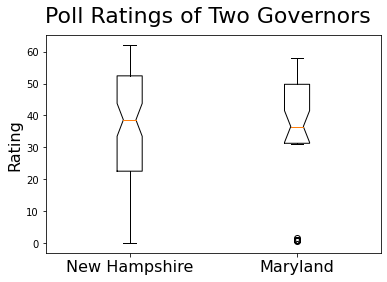

In [9]:
box = plt.boxplot([nh_ratings, md_ratings], notch=True)
plt.suptitle('Poll Ratings of Two Governors', fontsize=22)
plt.xticks([1, 2], ['New Hampshire', 'Maryland'], fontsize=16)
plt.ylabel('Rating', fontsize=16)

**Q3 Part B: Which of the two governors have a higher median rating?**

Based on the boxplot, the New Hampshire governor seems to have a slightly higher median rating. The governors' median ratings do not appear to differ significantly. The New Hampshire governor's median rating appears to be around 38, while the Maryland governor's rating appears to be about 35. The notching overlaps signify that the medians are similar and the 

**Q3 Part C: Apply Mood's Median Test**

In [10]:
# scipy.stats.mood returns 1. the z-score for the hypothess test and 2. the p-value for the hypothesis test
stat, p, med, tbl = median_test(nh_ratings, md_ratings)

In [11]:
p

0.8851438301402731

The null hypothesis of Mood's Median Test is that the samples come from the same distribution. The alternative hypothesis is that they come from different distributions. Because the p value returned from Mood's Median Test is far above the threshold of .05, we have strong evidence for the null hypothesis, which is that the data comes from the same distribution. 

We conclude that we are fairly confident that the governor's median ratings do not vary significantly. 